# Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-2.94751815e-01,  1.84630078e-01],
       [ 1.27205419e+00, -1.86718023e-01],
       [ 2.96972263e-04,  8.45911721e-02],
       ...,
       [ 1.40497859e+00, -6.00239778e-01],
       [-5.53049468e-01, -9.98220446e-01],
       [ 1.20679998e-01, -6.90020335e-01]])

In [5]:
y

array([   6.16451003,   15.78514527,    3.73227566,  -72.97857068,
         -3.58888021,   25.30391893,   87.55408763,   79.43542507,
        -35.2802079 , -121.94047202,   87.96649906,  -10.21897917,
        -68.07506323,   40.08514562,   12.75427094,   78.12401664,
       -132.152762  ,   39.07677413,   12.24466725,   32.24850582,
        -15.43089306,   45.84117189,  -30.40582196, -126.5414611 ,
         67.81629975,  -24.31722971,   82.32894816,  105.37858368,
        -26.3718879 ,  -31.67187599,   68.46140875,  133.6802088 ,
        -73.74429121, -128.44704315,  -38.40932744,  -53.27243923,
         31.87945128,   16.1625994 ,  -13.01609281,  -40.89925861,
         84.96173447,   15.33340471,  -83.41880366,    1.04981711,
        -59.52094297,   15.03622656,   60.4728263 ,   30.90735217,
        113.44257962,   32.30580332,   -9.37429846, -123.50865171,
         57.15174305,  114.31572574,    4.94006017,  -57.20232226,
        -43.36326572,   55.68706399,   -6.53979196,  129.63567

In [6]:
pd.DataFrame(X)[0]

0     -0.294752
1      1.272054
2      0.000297
3     -0.491175
4     -1.704609
         ...   
995    1.001083
996    0.808592
997    1.404979
998   -0.553049
999    0.120680
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

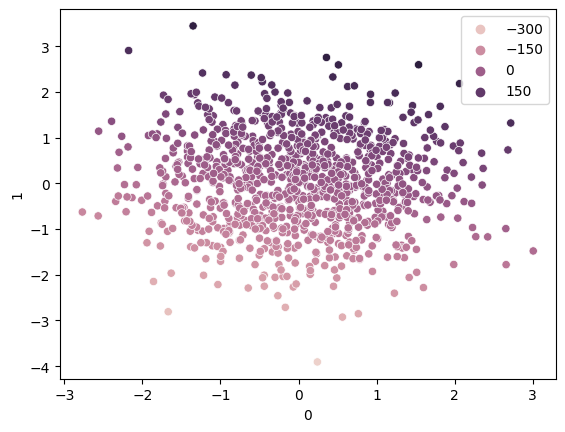

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[27.19227104, 87.18220839]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  29.32716235,  -21.18857425,  -14.14375343,   60.24366436,
         48.82422971,   71.21742632, -148.858816  ,   51.38812369,
         -2.99530776,   46.64037986, -109.63436719,   -0.94321746,
         21.62437131,  -29.92821771,  -72.40926731,  -33.71024803,
         58.16598642,  -49.70421027,   32.27498167,   39.33643236,
       -116.19149859, -118.90083131,  -26.6359693 , -167.42458609,
         23.06826047, -132.45899541,   86.26167044,  188.86095427,
       -145.07784134,  -83.4074373 ,   16.82326497,   56.39704066,
         30.9925911 ,  -23.39428406,    1.59116601,  -16.98581718,
        124.79706503,  112.88020509,  141.53877886,  103.48830694,
         59.52039793,   88.80412274,  -98.95953378,  155.67428614,
        -16.38992101,  -29.44431179, -166.18083738,    6.60706726,
       -139.9672    ,   53.76245625,  103.57651283,   24.25986147,
         24.42974221,  -91.04157602,   66.79110529, -124.60932956,
        195.2828707 ,   46.630485  ,  -51.31907865,  -33.18547

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9988935333874027


# Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.740 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.740 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.746 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[C

[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.

[CV 4/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.2s
[CV

[CV 3/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   1.2s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   1.9s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   1.2s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   1.3s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   1.1s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   1.3s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   1.9s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   1.2s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   1.2s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   1.1s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))